In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("zomato-2.xlsx")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.drop(["url","address","reviews_list","phone","menu_item"],inplace=True,axis=1)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [10]:
df.shape

(51717, 12)

In [10]:
df.duplicated().sum()

108

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(51609, 12)

In [13]:
df["name"].isnull().sum()

0

In [14]:
df["name"][0:21]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [15]:
df["name"].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [16]:
import re 
def rest_name(names):
    if re.findall(r"[A-Za-z0-9]",names):
        str_name=re.findall(r"[A-Za-z0-9]",names)
        str_name2="".join(str_name)
        return str_name2
    else:
        return names

In [17]:
df["name"]=df["name"].astype(str)
df["name"]=df["name"].apply(rest_name)

In [18]:
df["name"][0:21]

0                                       Jalsa
1                               SpiceElephant
2                               SanChurroCafe
3                         AddhuriUdupiBhojana
4                                GrandVillage
5                              TimepassDinner
6     RosewoodInternationalHotelBarRestaurant
7                                      Onesta
8                               PenthouseCafe
9                                   Smacznego
10                            CafDownTheAlley
11                                CafeShuffle
12                             TheCoffeeShack
13                                  CafEleven
14                              SanChurroCafe
15                               CafeVivacity
16                                 Catchupino
17                             KirthisBiryani
18                                    T3HCafe
19                  360AtomsRestaurantAndCafe
20                             TheVintageCafe
Name: name, dtype: object

In [19]:
df["online_order"].value_counts()

Yes    30361
No     21248
Name: online_order, dtype: int64

In [20]:
df["book_table"].value_counts()

No     45193
Yes     6416
Name: book_table, dtype: int64

In [21]:
df["rate"]

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51609, dtype: object

In [22]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
def clean_rates(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        rates_sp=float(str(rates).split("/")[0])
        return rates_sp

In [24]:
df["rate"]=df["rate"].apply(clean_rates)

In [25]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
df["rate"].fillna(df["rate"].mean(),inplace=True)

In [27]:
df["location"].isnull().sum()

21

In [28]:
df["location"].fillna("not avilable",inplace=True)

In [29]:
df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean(),inplace=True)

In [30]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [31]:
df["rest_type"].fillna("not aplicable",inplace=True)

In [32]:
df["dish_liked"].fillna("not aplicable",inplace=True)

In [33]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [34]:
df["cuisines"].fillna("not aplicable",inplace=True)

In [35]:
high_rate = df.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False).head(10).reset_index()

In [36]:
high_rate

,name,rate
0,AsiaKitchenByMainlandChina,4.900000
1,BygBrewskiBrewingCompany,4.900000
2,SantSpaCuisine,4.900000
3,PunjabGrill,4.871429
4,BelgianWaffleFactory,4.844828
5,ThePizzaBakery,4.800000
6,Flechazo,4.800000
7,OGVariarSons,4.800000
8,CTR,4.750000
9,BarbecuebyPunjabGrill,4.750000


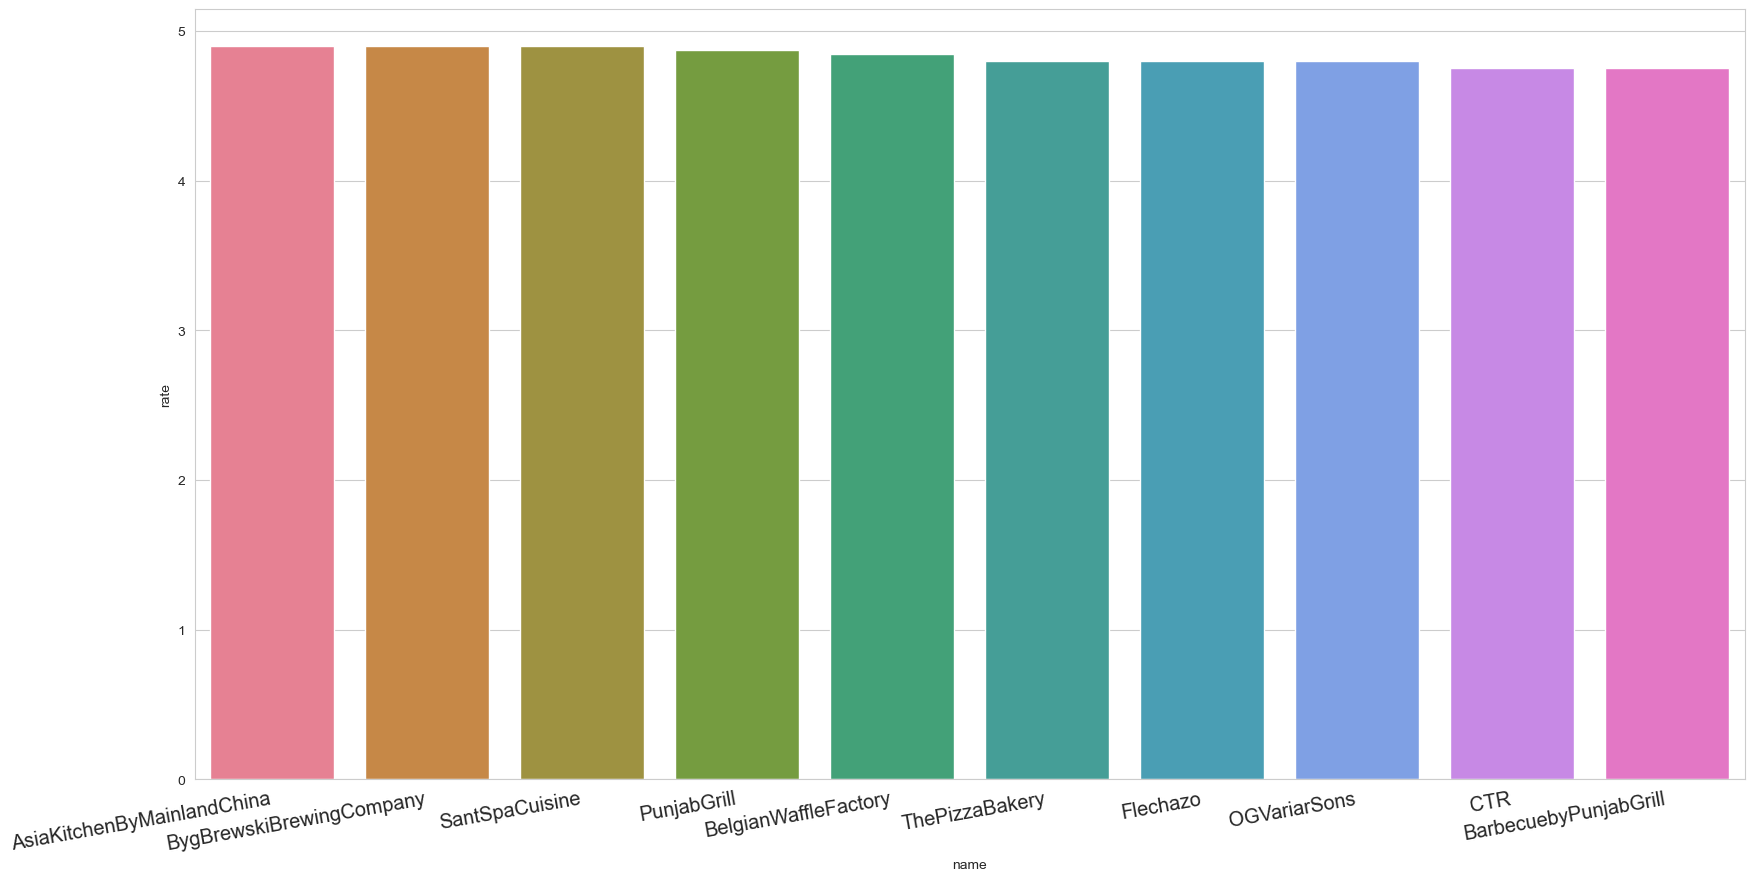

In [37]:
plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")
sb.barplot(x="name",y="rate",data=high_rate,palette='husl')
plt.xticks(rotation=10,horizontalalignment="right",fontsize="x-large")
plt.show()

In [55]:
high_vote=df.groupby("name")[["votes"]].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

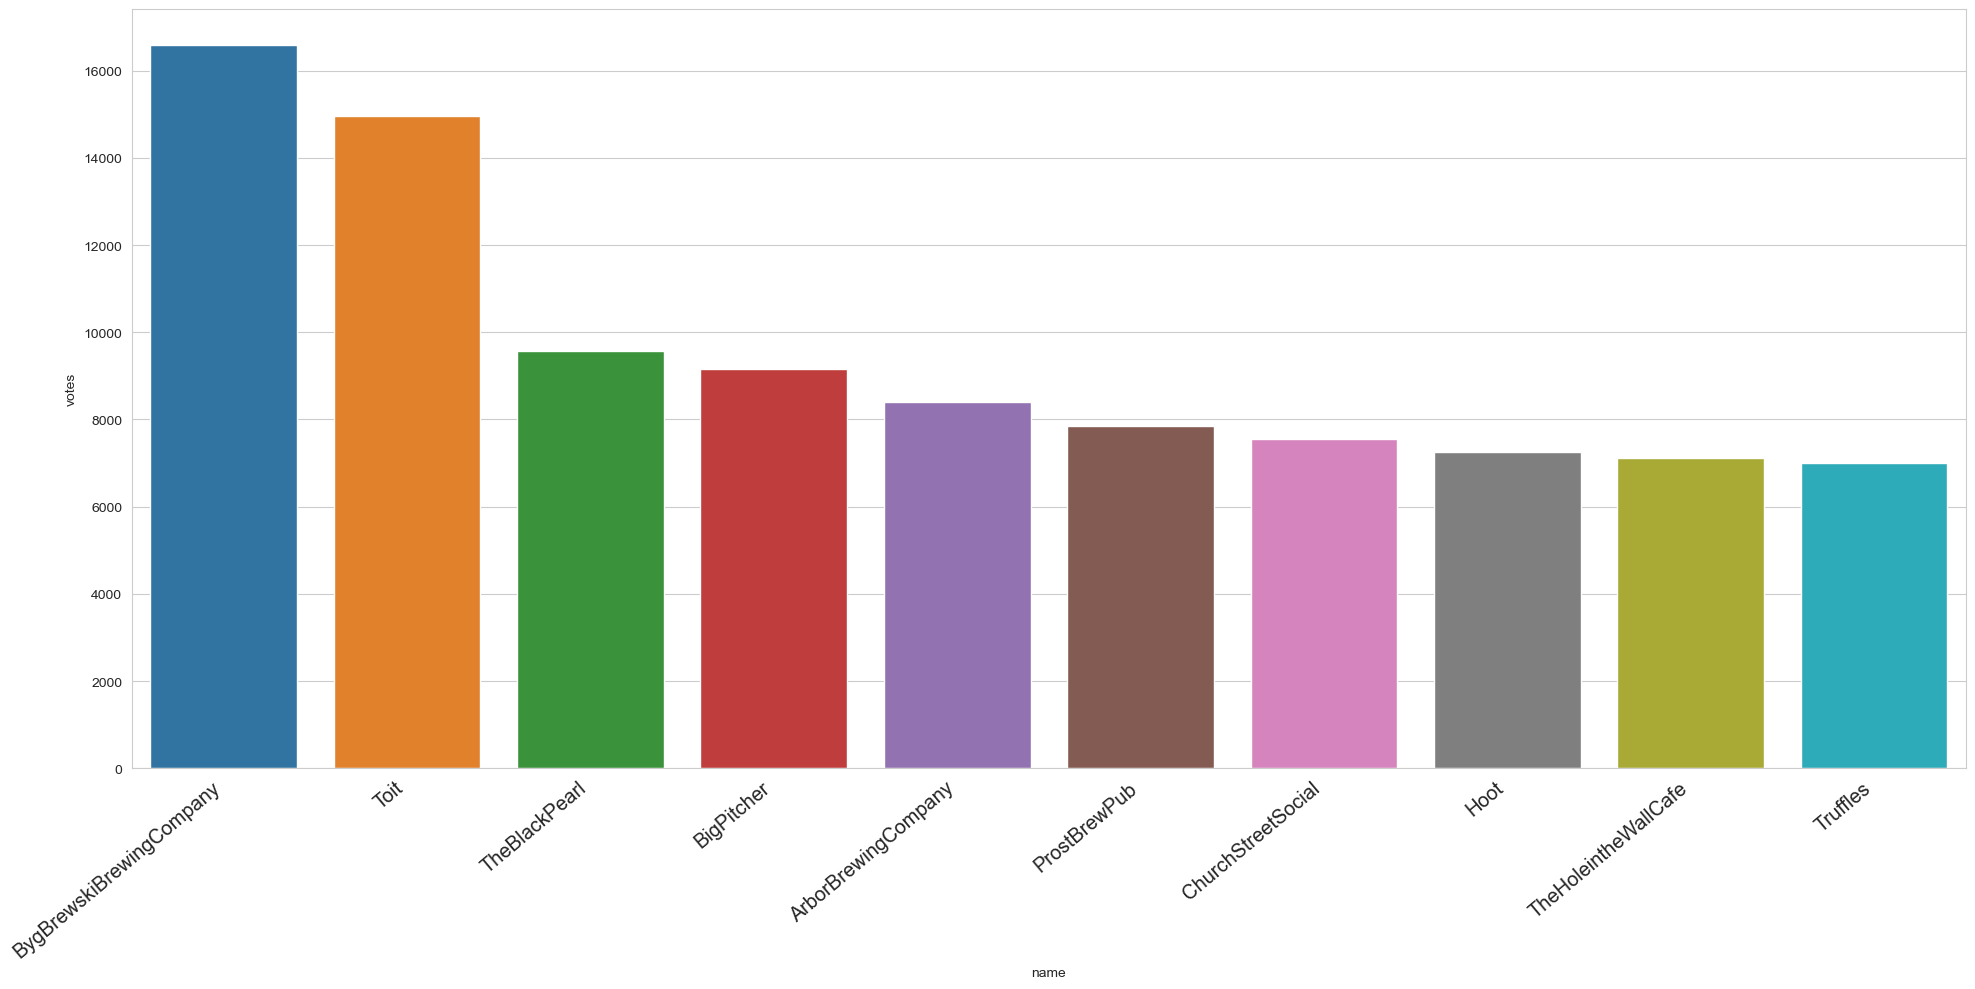

In [56]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="name",y="votes",data=high_vote)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

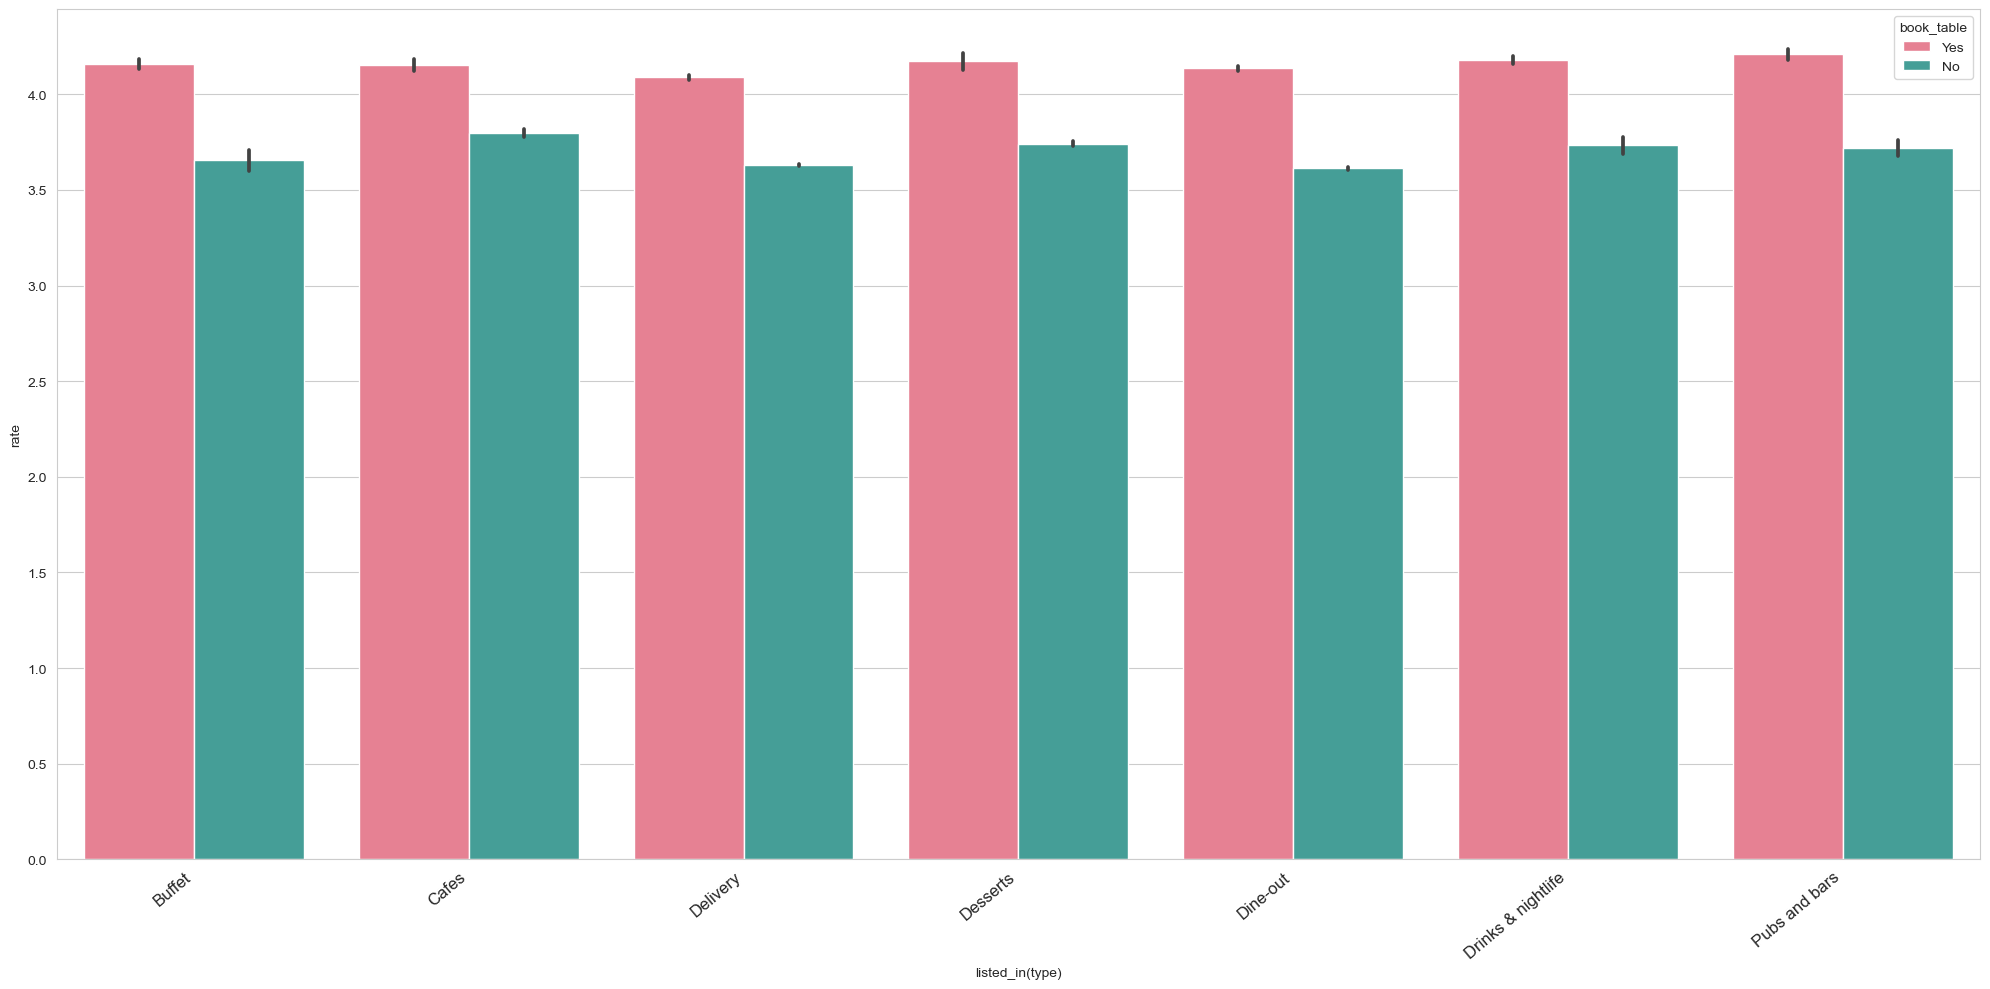

In [59]:
#find the rating types of resturent
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(type)",y="rate",data=df,hue="book_table",palette="husl")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="large")
plt.tight_layout()
plt.show()

In [60]:
#percentage of rating
types=df.groupby("listed_in(type)")["rate"].mean().reset_index()

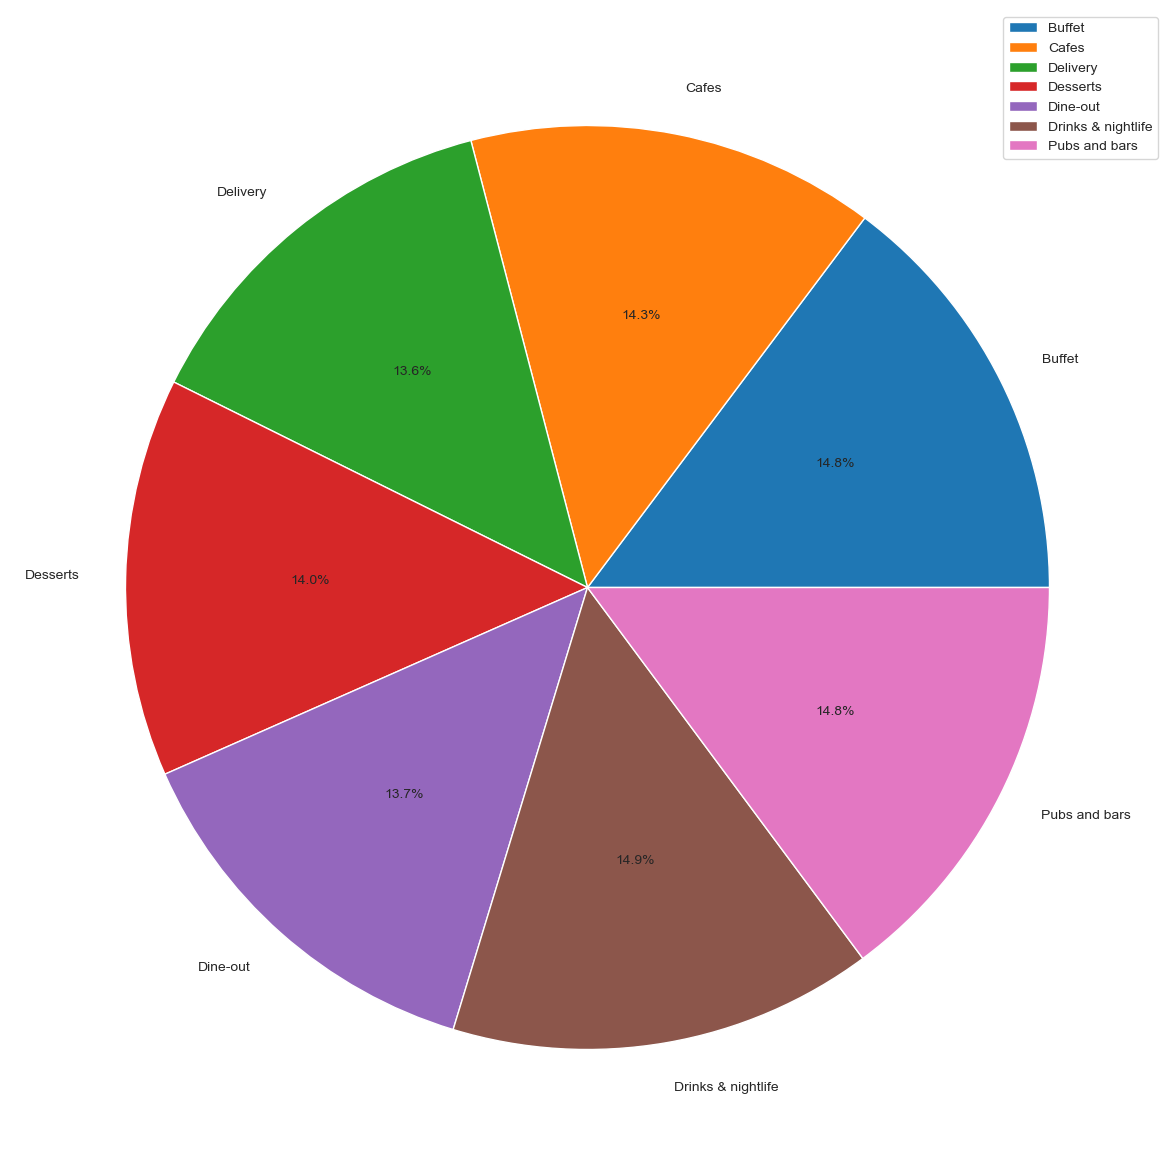

In [70]:
fig=plt.figure(figsize=(15,15))
per_types=pd.Series(types["listed_in(type)"])
per_rate=pd.Series(types["rate"])
plt.pie(per_rate,labels=per_types,autopct="%1.1f%%")
plt.legend()
plt.show()

In [71]:
#approx for two people in rsyurent
city=df.groupby("listed_in(type)")["approx_cost(for two people)"].mean().reset_index()

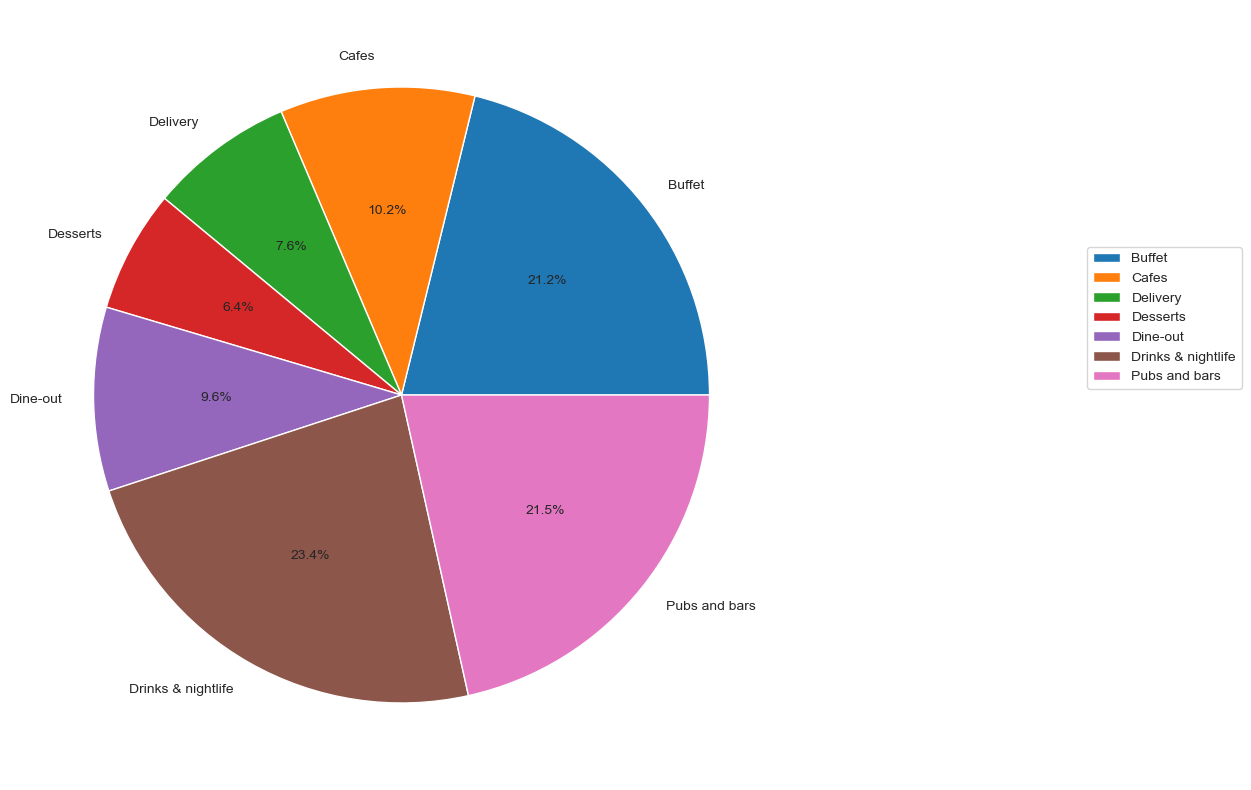

In [72]:
fig=plt.figure(figsize=(20,10))
per_city=pd.Series(city["listed_in(type)"])
per_rate=pd.Series(city["approx_cost(for two people)"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()

In [73]:
#rating of cuisines
cuisines=df.groupby("cuisines").mean().reset_index().iloc[1:31]

In [74]:
cuisines

,cuisines,rate,votes,approx_cost(for two people)
1,"African, Burger, Desserts, Beverages, Fast Food",4.600000,595.000000,1000.000000
2,American,3.564286,49.642857,717.857143
3,"American, Asian, Continental, North Indian, So...",4.100000,326.666667,1200.000000
4,"American, Asian, European, North Indian",4.300000,3868.750000,1400.000000
5,"American, BBQ",4.500000,5276.583333,2500.000000
6,"American, Bakery, Beverages, Cafe, Healthy Foo...",3.700142,0.000000,300.000000
7,"American, Burger, Fast Food",4.207143,289.000000,400.000000
8,"American, Burger, Italian, Steak",3.900000,1338.000000,1700.000000
9,"American, Burger, Momos, Bengali",3.500000,9.000000,400.000000
10,"American, Cafe, Chinese, Italian, Desserts",3.700142,0.000000,400.000000


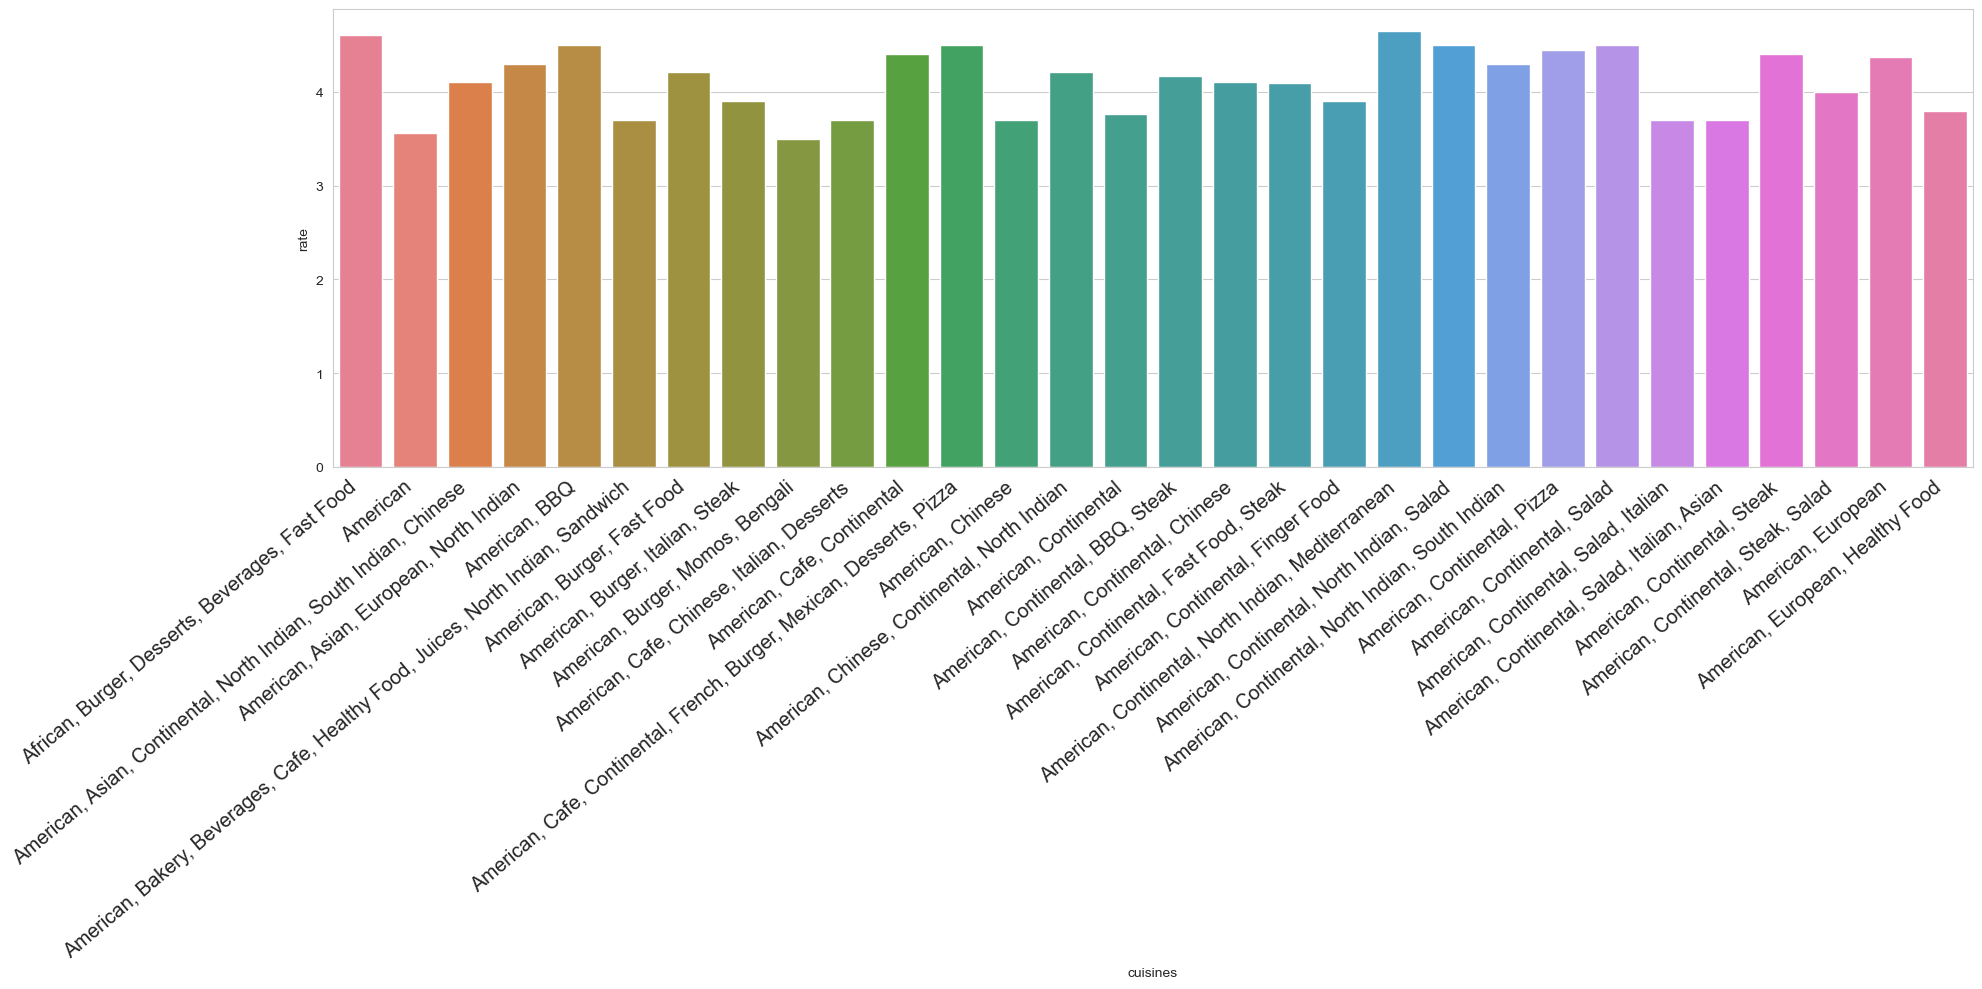

In [76]:
fig=plt.figure(figsize=(20,10))
sb.barplot(x="cuisines",y="rate",data=cuisines,palette="husl")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

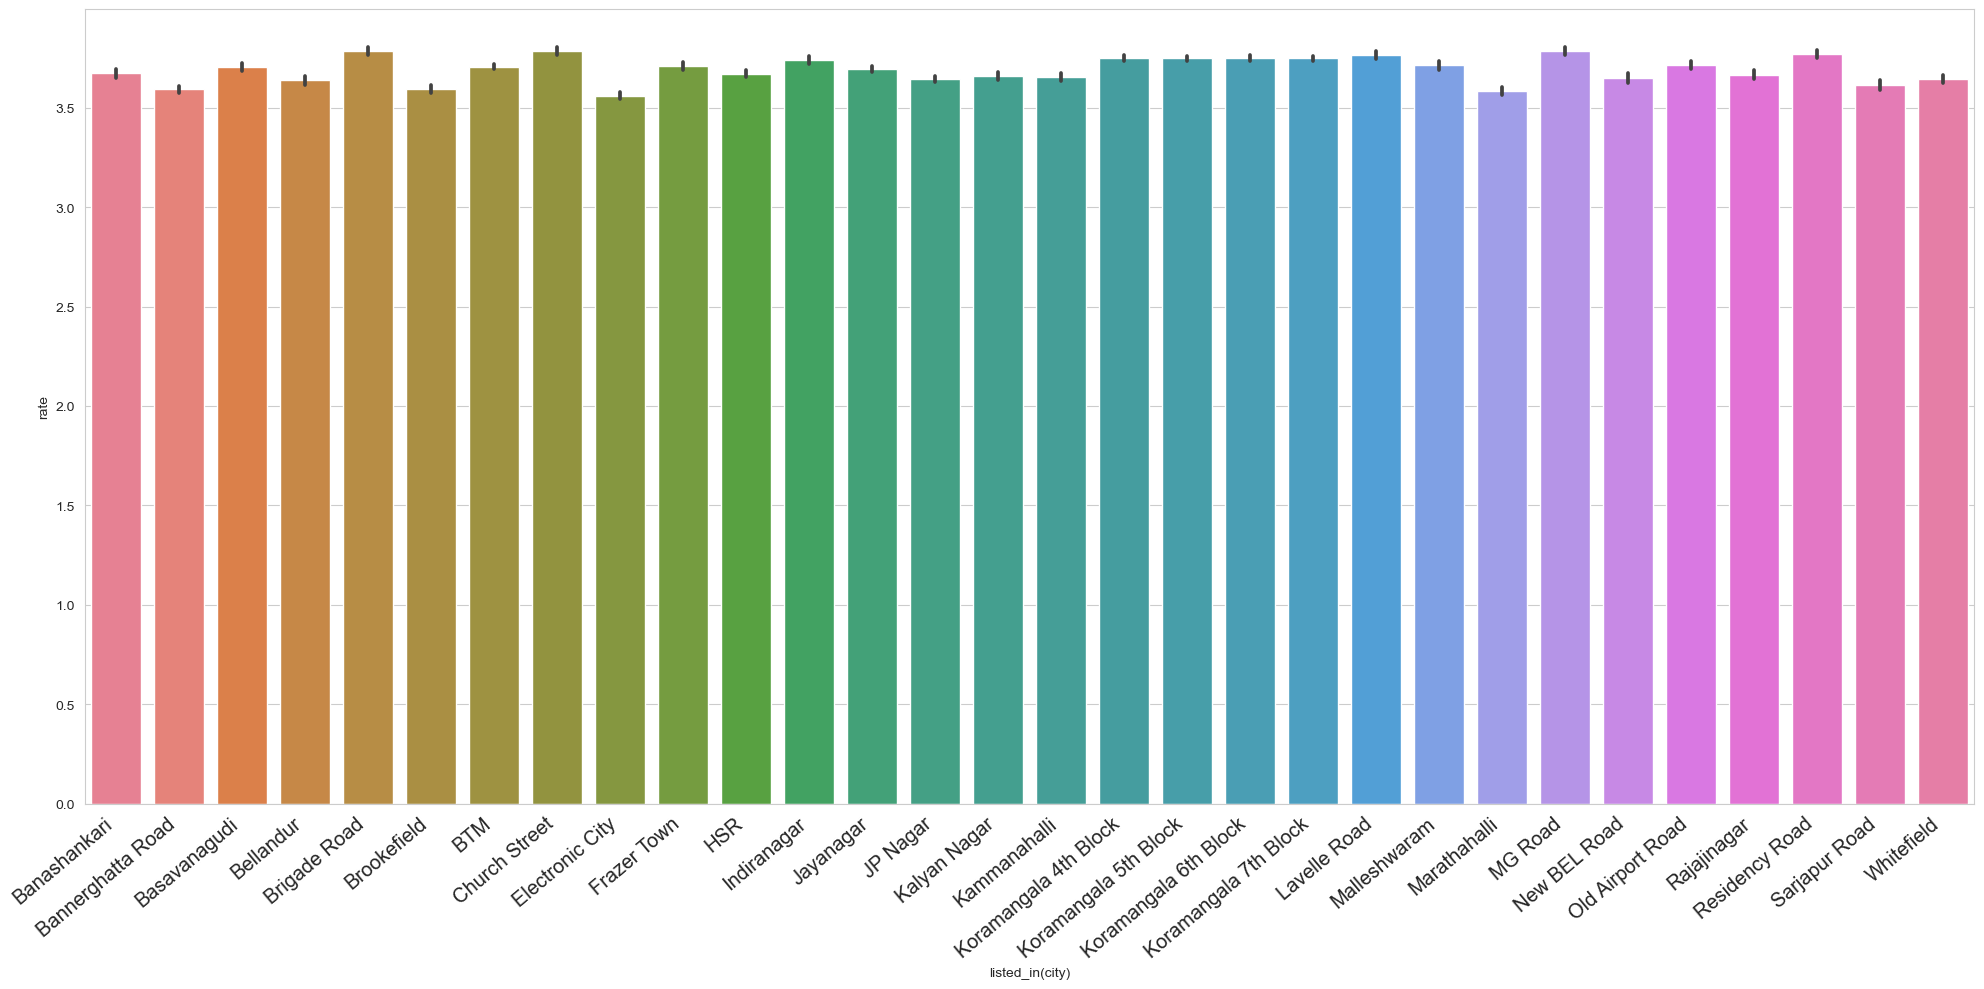

In [77]:
#location rating
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(city)",y="rate",data=df,palette="husl")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()